In [1]:
%matplotlib inline

import pandas as pd
import os
import glob

In [2]:
# Generate a list of input files
in_files = glob.glob('../data/*.txt')

# Instantiate empty dict to contain filepath:df pairs
dfs = {}

# Iterate over input files
for in_file in in_files:
    dfs[in_file] = pd.read_csv(in_file, header = None, names = ['name', 'sex', 'count'])
    dfs[in_file]['year'] = int(in_file[-8:-4]) # extract year from filename
    
# Concatenate all dfs
df = pd.concat(dfs.values())
df

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


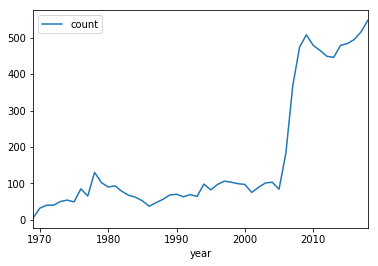

In [3]:
df[(df.name == 'Shiloh') & (df.sex == 'F')].plot.line('year', 'count')

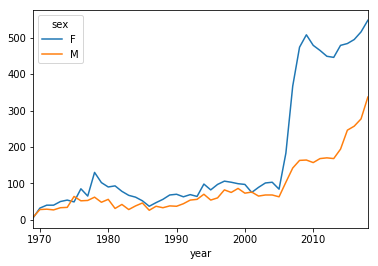

In [4]:
df[df.name == 'Shiloh'].pivot('year', 'sex', 'count').plot.line()

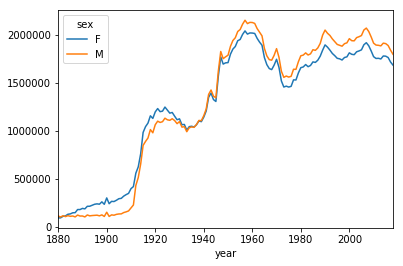

In [5]:
df.pivot_table('count', 'year', 'sex', 'sum').plot.line()

In [6]:
# Calculate annual total names by sex
totals = df.pivot_table('count', ['year', 'sex'], aggfunc = 'sum')
totals.columns = ['total']
totals

total
year sex         
1880 F      90994
     M     110490
1881 F      91953
     M     100743
1882 F     107847
     M     113686
1883 F     112319
     M     104625
1884 F     129019
     M     114442
1885 F     133055
     M     107799
1886 F     144533
     M     110785
1887 F     145981
     M     101412
1888 F     178622
     M     120851
1889 F     178366
     M     110580
1890 F     190376
     M     111025
1891 F     185480
     M     101191
1892 F     212339
     M     122037
1893 F     212905
     M     112319
1894 F     222921
     M     115769
...           ...
2004 F    1835091
     M    1983722
2005 F    1846525
     M    1996022
2006 F    1899824
     M    2053753
2007 F    1921053
     M    2073784
2008 F    1889069
     M    2038194
2009 F    1835062
     M    1981481
2010 F    1775345
     M    1916476
2011 F    1756592
     M    1896574
2012 F    1758171
     M    1893975
2013 F    1751320
     M    1888009
2014 F    1782350
     M    1916564
2015 F    1780453
     M    1911537
2016 F    1766212
     M    1891585
2017 F    1719138
     M    1842837
2018 F    1686961
     M    1800392

[278 rows x 1 columns]

In [7]:
# Set a meaningful index and join annual totals, calculate percent
df_idx = df.set_index(['year', 'sex'])
df_idx = df_idx.join(totals)
df_idx['pct'] = df_idx['count'] / df_idx['total']
df_idx

name  count    total       pct
year sex                                     
1880 F         Mary   7065    90994  0.077642
     F         Anna   2604    90994  0.028617
     F         Emma   2003    90994  0.022012
     F    Elizabeth   1939    90994  0.021309
     F       Minnie   1746    90994  0.019188
     F     Margaret   1578    90994  0.017342
     F          Ida   1472    90994  0.016177
     F        Alice   1414    90994  0.015539
     F       Bertha   1320    90994  0.014506
     F        Sarah   1288    90994  0.014155
     F        Annie   1258    90994  0.013825
     F        Clara   1226    90994  0.013473
     F         Ella   1156    90994  0.012704
     F     Florence   1063    90994  0.011682
     F         Cora   1045    90994  0.011484
     F       Martha   1040    90994  0.011429
     F        Laura   1012    90994  0.011122
     F       Nellie    995    90994  0.010935
     F        Grace    982    90994  0.010792
     F       Carrie    949    90994  0.010429
     F        Maude    859    90994  0.009440
     F        Mabel    808    90994  0.008880
     F       Bessie    796    90994  0.008748
     F       Jennie    793    90994  0.008715
     F     Gertrude    787    90994  0.008649
     F        Julia    783    90994  0.008605
     F       Hattie    769    90994  0.008451
     F        Edith    768    90994  0.008440
     F       Mattie    704    90994  0.007737
     F         Rose    700    90994  0.007693
...             ...    ...      ...       ...
2018 M      Zerrick      5  1800392  0.000003
     M       Zeshan      5  1800392  0.000003
     M        Zevan      5  1800392  0.000003
     M      Zhander      5  1800392  0.000003
     M         Zhen      5  1800392  0.000003
     M        Zheng      5  1800392  0.000003
     M      Zhiheng      5  1800392  0.000003
     M        Ziaan      5  1800392  0.000003
     M       Zichen      5  1800392  0.000003
     M        Zidon      5  1800392  0.000003
     M         Zien      5  1800392  0.000003
     M         Zier      5  1800392  0.000003
     M       Zierre      5  1800392  0.000003
     M        Zihir      5  1800392  0.000003
     M          Zim      5  1800392  0.000003
     M          Zin      5  1800392  0.000003
     M        Zishe      5  1800392  0.000003
     M        Zmari      5  1800392  0.000003
     M         Zoel      5  1800392  0.000003
     M         Zola      5  1800392  0.000003
     M        Zuber      5  1800392  0.000003
     M       Zubeyr      5  1800392  0.000003
     M        Zyell      5  1800392  0.000003
     M       Zyheem      5  1800392  0.000003
     M       Zykeem      5  1800392  0.000003
     M        Zylas      5  1800392  0.000003
     M        Zyran      5  1800392  0.000003
     M        Zyrie      5  1800392  0.000003
     M        Zyron      5  1800392  0.000003
     M        Zzyzx      5  1800392  0.000003

[1957046 rows x 4 columns]

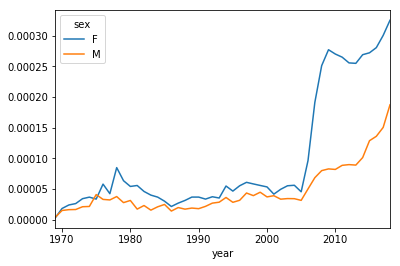

In [8]:
df_idx[df_idx.name == 'Shiloh'].unstack().plot.line(y = 'pct')

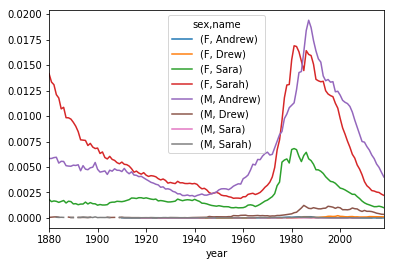

In [9]:
df_idx[df_idx.name.isin(['Drew', 'Andrew', 'Sara', 'Sarah'])].pivot_table('pct', 'year', ['sex', 'name'], 'sum').plot()